In [2]:
import torch

model = nn.Sequential(
    torch.nn.Conv2d(1, 20, 5),
    torch.nn.ReLU(),
    torch.nn.Conv2d(20, 64, 5),
    torch.nn.ReLU()
)
model

Sequential(
  (0): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): Conv2d(20, 64, kernel_size=(5, 5), stride=(1, 1))
  (3): ReLU()
)

In [5]:
from collections import OrderedDict

model = torch.nn.Sequential(OrderedDict([
    ("conv_1", torch.nn.Conv2d(1, 20, 5)),
    ("relu_1", torch.nn.ReLU()),
    ("conv_2", torch.nn.Conv2d(20, 64, 5)),
    ("relu_2", torch.nn.ReLU())
]))
model

Sequential(
  (conv_1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (relu_1): ReLU()
  (conv_2): Conv2d(20, 64, kernel_size=(5, 5), stride=(1, 1))
  (relu_2): ReLU()
)

### 1-2-2. Class
Your model should subclass `torch.nn.Module`. `torch.nn` holds basic build blocks for graphs.
1. `torch.nn.Module.parameters(recurse=True)`: Returns an iterator over module learnable parameters (weights & biases). This is typically passed to an optimizer.
2. `torch.nn.Module.named_parameters(prefix='', recurse=True, remove_duplicate=True)`: Returns an iterator over module parameters, yielding both the name of the parameter as well as the parameter itself.
3. `torch.nn.Module.to(device=None, dtype=None, non_blocking=False)`: Moves and/or casts the parameters and buffers.
4. `torch.nn.Module.load_state_dict(state_dict, strict=True, assign=False)`: Copies parameters and buffers from `state_dict` into this module and its descendants.
5. `torch.nn.Module.state_dict(*, destination: T_destination, prefix: str = '', keep_vars: bool = False)`: A Python dictionary object contains parameters & persistent buffers. 

In [14]:
class CNNModel(torch.nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv_layers = torch.nn.Sequential(
            torch.nn.Conv2d(1, 20, 5),
            torch.nn.ReLU(),
            torch.nn.Conv2d(20, 64, 5),
            torch.nn.ReLU()
        )
  
    def forward(self, X):
        out = self.conv_layers(X)
        return out

model = CNNModel()
model

CNNModel(
  (conv_layers): Sequential(
    (0): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 64, kernel_size=(5, 5), stride=(1, 1))
    (3): ReLU()
  )
)

In [17]:
# `parameters()`
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[[[ 1.3241e-01,  1.5604e-01, -1.0033e-01,  1.9216e-01, -6.9605e-02],
          [ 1.7387e-01, -8.7238e-02, -8.7400e-02, -6.6454e-03, -1.3710e-02],
          [ 4.7818e-02, -1.3161e-01, -1.2073e-01, -8.0846e-02, -1.4806e-01],
          [ 1.5466e-01,  1.7643e-01,  6.8757e-02, -1.3546e-01,  8.1396e-02],
          [ 1.4838e-01, -1.3129e-01, -3.4942e-02,  1.3256e-01,  1.8711e-01]]],


        [[[-1.7838e-01,  9.0442e-02,  9.4969e-02,  1.9040e-01, -5.6426e-02],
          [ 1.4222e-01,  1.0127e-01, -9.1116e-03, -2.4985e-02, -1.6505e-01],
          [ 1.7914e-01, -7.6648e-02, -1.7809e-01,  1.2110e-01, -5.1342e-02],
          [ 2.2690e-02,  1.5465e-01, -8.5308e-02, -4.7745e-02,  3.1571e-02],
          [ 2.8867e-02, -3.0587e-02, -3.1570e-02, -1.9829e-01, -4.0238e-02]]],


        [[[ 1.3186e-01, -1.4602e-01,  9.5862e-02, -8.8489e-02, -9.6553e-02],
          [-1.3332e-01,  1.1675e-02,  1.6270e-01,  1.4342e-01,  1.4186e-02],
          [ 6.7934e-02,  1.0176e-02,  5.6962e-

In [22]:
# `named_parameters()`
for name, param in model.named_parameters():
    print("Name:", name)
    print(param)

Name: conv_layers.0.weight
Parameter containing:
tensor([[[[ 1.3241e-01,  1.5604e-01, -1.0033e-01,  1.9216e-01, -6.9605e-02],
          [ 1.7387e-01, -8.7238e-02, -8.7400e-02, -6.6454e-03, -1.3710e-02],
          [ 4.7818e-02, -1.3161e-01, -1.2073e-01, -8.0846e-02, -1.4806e-01],
          [ 1.5466e-01,  1.7643e-01,  6.8757e-02, -1.3546e-01,  8.1396e-02],
          [ 1.4838e-01, -1.3129e-01, -3.4942e-02,  1.3256e-01,  1.8711e-01]]],


        [[[-1.7838e-01,  9.0442e-02,  9.4969e-02,  1.9040e-01, -5.6426e-02],
          [ 1.4222e-01,  1.0127e-01, -9.1116e-03, -2.4985e-02, -1.6505e-01],
          [ 1.7914e-01, -7.6648e-02, -1.7809e-01,  1.2110e-01, -5.1342e-02],
          [ 2.2690e-02,  1.5465e-01, -8.5308e-02, -4.7745e-02,  3.1571e-02],
          [ 2.8867e-02, -3.0587e-02, -3.1570e-02, -1.9829e-01, -4.0238e-02]]],


        [[[ 1.3186e-01, -1.4602e-01,  9.5862e-02, -8.8489e-02, -9.6553e-02],
          [-1.3332e-01,  1.1675e-02,  1.6270e-01,  1.4342e-01,  1.4186e-02],
          [ 6.7934e

In [23]:
# `named_parameters()` & `data` attribute
for name, param in model.named_parameters():
    print("Name:", name)
    print("Parameters:", param.data)

Name: conv_layers.0.weight
Parameters: tensor([[[[ 1.3241e-01,  1.5604e-01, -1.0033e-01,  1.9216e-01, -6.9605e-02],
          [ 1.7387e-01, -8.7238e-02, -8.7400e-02, -6.6454e-03, -1.3710e-02],
          [ 4.7818e-02, -1.3161e-01, -1.2073e-01, -8.0846e-02, -1.4806e-01],
          [ 1.5466e-01,  1.7643e-01,  6.8757e-02, -1.3546e-01,  8.1396e-02],
          [ 1.4838e-01, -1.3129e-01, -3.4942e-02,  1.3256e-01,  1.8711e-01]]],


        [[[-1.7838e-01,  9.0442e-02,  9.4969e-02,  1.9040e-01, -5.6426e-02],
          [ 1.4222e-01,  1.0127e-01, -9.1116e-03, -2.4985e-02, -1.6505e-01],
          [ 1.7914e-01, -7.6648e-02, -1.7809e-01,  1.2110e-01, -5.1342e-02],
          [ 2.2690e-02,  1.5465e-01, -8.5308e-02, -4.7745e-02,  3.1571e-02],
          [ 2.8867e-02, -3.0587e-02, -3.1570e-02, -1.9829e-01, -4.0238e-02]]],


        [[[ 1.3186e-01, -1.4602e-01,  9.5862e-02, -8.8489e-02, -9.6553e-02],
          [-1.3332e-01,  1.1675e-02,  1.6270e-01,  1.4342e-01,  1.4186e-02],
          [ 6.7934e-02,  1.01

In [25]:
# `state_dict()`
model.state_dict()

OrderedDict([('conv_layers.0.weight',
              tensor([[[[ 1.3241e-01,  1.5604e-01, -1.0033e-01,  1.9216e-01, -6.9605e-02],
                        [ 1.7387e-01, -8.7238e-02, -8.7400e-02, -6.6454e-03, -1.3710e-02],
                        [ 4.7818e-02, -1.3161e-01, -1.2073e-01, -8.0846e-02, -1.4806e-01],
                        [ 1.5466e-01,  1.7643e-01,  6.8757e-02, -1.3546e-01,  8.1396e-02],
                        [ 1.4838e-01, -1.3129e-01, -3.4942e-02,  1.3256e-01,  1.8711e-01]]],
              
              
                      [[[-1.7838e-01,  9.0442e-02,  9.4969e-02,  1.9040e-01, -5.6426e-02],
                        [ 1.4222e-01,  1.0127e-01, -9.1116e-03, -2.4985e-02, -1.6505e-01],
                        [ 1.7914e-01, -7.6648e-02, -1.7809e-01,  1.2110e-01, -5.1342e-02],
                        [ 2.2690e-02,  1.5465e-01, -8.5308e-02, -4.7745e-02,  3.1571e-02],
                        [ 2.8867e-02, -3.0587e-02, -3.1570e-02, -1.9829e-01, -4.0238e-02]]],
              
   

### 1-2-3. Summary

In [28]:
from torchinfo import summary

summary(model)

Layer (type:depth-idx)                   Param #
CNNModel                                 --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       520
│    └─ReLU: 2-2                         --
│    └─Conv2d: 2-3                       32,064
│    └─ReLU: 2-4                         --
Total params: 32,584
Trainable params: 32,584
Non-trainable params: 0

In [29]:
summary(model, input_size=(32, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
CNNModel                                 [32, 64, 20, 20]          --
├─Sequential: 1-1                        [32, 64, 20, 20]          --
│    └─Conv2d: 2-1                       [32, 20, 24, 24]          520
│    └─ReLU: 2-2                         [32, 20, 24, 24]          --
│    └─Conv2d: 2-3                       [32, 64, 20, 20]          32,064
│    └─ReLU: 2-4                         [32, 64, 20, 20]          --
Total params: 32,584
Trainable params: 32,584
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 420.00
Input size (MB): 0.10
Forward/backward pass size (MB): 9.50
Params size (MB): 0.13
Estimated Total Size (MB): 9.73

# 12. Recurrent Neural Networks (RNNs)
[Large Movie Review Dataset](https://ai.stanford.edu/%7Eamaas/data/sentiment/) for binary sentiment classification from Stanford.
- [imdb_reviews](https://www.tensorflow.org/datasets/catalog/imdb_reviews)

In [1]:
import pandas as pd
import glob

# Get the class names from the target directory
class_names_found = ['pos', 'neg']

# Construct a pandas DataFrame using `read()`
dict_train = []

for class_name in class_names_found:
    doc_lst = glob.glob(f"./datasets/aclImdb_v1/aclImdb/train/{class_name}/*.txt", recursive=True)
    for filename in doc_lst:
        with open(filename, 'r', errors='replace') as f:
            # Use `read()` instead of `readlines()`
            doc = f.read()
            dict_train.append({"text": doc, "label": class_name})

df_train = pd.DataFrame(dict_train)
df_train

,text,label
0,I don't understand why the other comments focu...,pos
1,The information contained in this movie is som...,pos
2,The premise of this anime series is about brea...,pos
3,"I watched the first series avidly, but wondere...",pos
4,"""GOOD TIMES,"" in my opinion, is a must-see CBS...",pos
...,...,...
24995,"First of all, I was expecting ""Caged Heat"" to ...",neg
24996,THIS IS NOT A CHILDREN'S MOVIE!!!<br /><br />T...,neg
24997,"Perhaps because I was so young, innocent and B...",neg
24998,By all the fawning people have been doing over...,neg


In [2]:
# Construct a pandas DataFrame using `read()`
dict_test = []

for class_name in class_names_found:
    doc_lst = glob.glob(f"./datasets/aclImdb_v1/aclImdb/test/{class_name}/*.txt", recursive=True)
    for filename in doc_lst:
        with open(filename, 'r', errors='replace') as f:
            # Use `read()` instead of `readlines()`
            doc = f.read()
            dict_test.append({"text": doc, "label": class_name})

df_test = pd.DataFrame(dict_test)
df_test

,text,label
0,I like both this version of DORIAN GRAY and th...,pos
1,"On the face of it, any teen comedy runs the ri...",pos
2,"""Icky Flix"" is an excellent starting point for...",pos
3,"I just saw this at SIFF, and I absolutely love...",pos
4,"The creative team of Jim Abrahams, David Zucke...",pos
...,...,...
24995,I am sitting here writing this review and the ...,neg
24996,I can't believe some of the scores this film i...,neg
24997,"I have just watched this ""latest"" version of M...",neg
24998,"Woa, talk about awful. Do not waste your time....",neg


In [3]:
df_train['label'] = df_train['label'].map({'neg': 0, 'pos': 1})
df_train

,text,label
0,I don't understand why the other comments focu...,1
1,The information contained in this movie is som...,1
2,The premise of this anime series is about brea...,1
3,"I watched the first series avidly, but wondere...",1
4,"""GOOD TIMES,"" in my opinion, is a must-see CBS...",1
...,...,...
24995,"First of all, I was expecting ""Caged Heat"" to ...",0
24996,THIS IS NOT A CHILDREN'S MOVIE!!!<br /><br />T...,0
24997,"Perhaps because I was so young, innocent and B...",0
24998,By all the fawning people have been doing over...,0


In [4]:
df_test['label'] = df_test['label'].map({'neg': 0, 'pos': 1})
df_test

,text,label
0,I like both this version of DORIAN GRAY and th...,1
1,"On the face of it, any teen comedy runs the ri...",1
2,"""Icky Flix"" is an excellent starting point for...",1
3,"I just saw this at SIFF, and I absolutely love...",1
4,"The creative team of Jim Abrahams, David Zucke...",1
...,...,...
24995,I am sitting here writing this review and the ...,0
24996,I can't believe some of the scores this film i...,0
24997,"I have just watched this ""latest"" version of M...",0
24998,"Woa, talk about awful. Do not waste your time....",0


## 7-1. Masking & Padding

**Masking** is a way to tell sequence-processing layers that certain timesteps in an input are missing, and thus should be skipped when processing the data. **Padding** is a special form of masking where the masked steps are at the start or the end of a sequence. Padding comes from the need to encode sequence data into contiguous batches. In order to make all sequences in a batch fit a given standard length, it is necessary to pad or truncate some sequences. The steps are as follows:

- Truncate and pad samples to a uniform length, for Individual samples of sequence data usually have different lengths.
- Mask some parts of the input data which are actually paddings and should be ignored before sent to the model.
- Re-pad the model outputs for the final output layer to get scores over the vocabulary space.

There are several approaches in PyTorch:
- Just pad the sequences and train the model without masking. It is computationally inefficient, but it does not lead to inaccurate representations. Need more logic to extract correct representations for sequences.
    - For RNN modules with only forward direction, pick up the hidden vector from `L`th step, instead of the last step, as a representation.
    - For bidirectional RNN modules, have to work with pre padding & post padding at once, and finally extract and concatenate the hidden vectors as above.
- Or perform **Sequence Packing**, creating a consistent-sized data structure, `PackedSequence`, composed of variable length sequences, with PyTorch utility functions.
    - Create a custom `Dataset` class because `TensorDataset` does not allow variable sequence lengths.
    - Pad sequences in custom `collate_fn` of `DataLoader` and also return original sequence lengths for used later in `pack_padded_sequence`.

PyTorch:

1. `torch.nn.utils.rnn.pad_sequence(sequences, batch_first=False, padding_value=0.0)`: Stacks a list of `Tensor`s along a new dimension and pads them to equal length. For example, if the input is a list of sequences with size `(L, *)` and `batch_first` is False, the output is of size `(B, T, *)`. `B` is batch size. It is equal to the number of elements in sequences. `T` is length of the longest sequence. `L` is length of the sequence. `*` is any number of trailing dimensions, including `None`. Only supports post padding.
   - Because of **Gradient Vanishing**, pre padding is recommended.
   - [Effects of Padding on LSTMs & CNNs](https://arxiv.org/abs/1903.07288)
2. `torch.nn.utils.rnn.pack_padded_sequence(input, lengths, batch_first=False, enforce_sorted=True)`: Packs a `Tensor` containing padded sequences of variable length. All RNN modules in PyTorch accept packed sequences as inputs. If `enforce_sorted` is `True`, the input is expected to contain sequences sorted by length in a decreasing order. If `False`, the input will get sorted unconditionally.
3. `torch.nn.utils.rnn.pad_packed_sequence(sequence, batch_first=False, padding_value=0.0, total_length=None)`: Pads a packed batch of variable length sequences.
4. `torch.nn.utils.rnn.pack_sequence(sequences, enforce_sorted=True)`: Consecutive call of `pad_sequence` & `pack_padded_sequence`.

Keras:

5. `tf.keras.utils.pad_sequences(sequences, maxlen=None, dtype='int32', padding='pre', truncating='pre', value=0.0)`: Supports truncating and pre padding.
   - [Masking](https://www.tensorflow.org/guide/keras/understanding_masking_and_padding#masking) in TensorFlow

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.text)
sequences_train = tokenizer.texts_to_sequences(df_train.text)
# filtered_sequence_train = list(filter(lambda x: (x != []), sequence_train))
sequences_test = tokenizer.texts_to_sequences(df_test.text)

# Get sequence lengths
train_lengths = [len(x) for x in sequences_train]
test_lengths = [len(x) for x in sequences_test]

word2idx = tokenizer.word_index
V = len(word2idx)
print("Found %s unique tokens." % V)

2024-07-22 01:59:05.569021: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-22 01:59:05.576823: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-22 01:59:05.586475: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-22 01:59:05.586489: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-22 01:59:05.592718: I tensorflow/core/platform/cpu_feature_gua

Found 88582 unique tokens.


In [258]:
# `pad_sequences()` from Keras
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Pad sequences so that we get a N x T matrix
data_train = pad_sequences(sequences_train)
print("Shape of Training Set Tensor:", data_train.shape)
print("Sample:", data_train[0])

Shape of Training Set Tensor: (25000, 2493)
Sample: [  0   0   0 ...  73 326 218]


In [259]:
# `pad_sequence()`
from torch.nn.utils.rnn import pad_sequence

# Convert list of lists to list of tensors
sequences_train_tensor = list(map(lambda x: torch.as_tensor(x), sequences_train))
data_train = pad_sequence(sequences=sequences_train_tensor, batch_first=True)
print("Shape of Training Set Tensor:", data_train.shape)
print("Sample:", data_train[0])

Shape of Training Set Tensor: torch.Size([25000, 2493])
Sample: tensor([ 10,  89, 388,  ...,   0,   0,   0])


In [261]:
# `pack_padded_sequence()`
from torch.nn.utils.rnn import pack_padded_sequence

train_lengths_tensor = torch.as_tensor(train_lengths)
packed_data_train = pack_padded_sequence(input=data_train, lengths=train_lengths_tensor, batch_first=True, enforce_sorted=False)
packed_data_train

PackedSequence(data=tensor([1012, 2737,  688,  ...,    3,    7,    7]), batch_sizes=tensor([25000, 25000, 25000,  ...,     1,     1,     1]), sorted_indices=tensor([ 5079,   329,  7842,  ..., 22795, 24523, 13597]), unsorted_indices=tensor([16274,  9240, 19451,  ..., 15842,  6124,  2493]))

In [262]:
# `pad_packed_sequence()`
from torch.nn.utils.rnn import pad_packed_sequence

unpacked_data_train, unpacked_train_lengths = pad_packed_sequence(sequence=packed_data_train, batch_first=True)
print("Shape of Training Set Tensor:", unpacked_data_train.shape)
print("Sample:", unpacked_data_train[0])

Shape of Training Set Tensor: torch.Size([25000, 2493])
Sample: tensor([ 10,  89, 388,  ...,   0,   0,   0])


In [265]:
# `pack_sequence()`
sequences_train_tensor = list(map(lambda x: torch.as_tensor(x), sequences_train))
packed_data_train = pack_sequence(sequences=sequences_train_tensor, enforce_sorted=False)
packed_data_train

PackedSequence(data=tensor([1012, 2737,  688,  ...,    3,    7,    7]), batch_sizes=tensor([25000, 25000, 25000,  ...,     1,     1,     1]), sorted_indices=tensor([ 5079,   329,  7842,  ..., 22795, 24523, 13597]), unsorted_indices=tensor([16274,  9240, 19451,  ..., 15842,  6124,  2493]))

In [136]:
# Custom pre padding for PyTorch
from torch import Tensor
from typing import Union, List

def pad_sequence_with_pos(
    sequences: Union[Tensor, List[Tensor]],
    batch_first: bool = False,
    padding_value: float = 0.0,
    pos: str = 'post',
) -> Tensor:

    if pos == 'post':
        padded_sequence = torch._C._nn.pad_sequence(sequences, batch_first, padding_value)
    elif pos == 'pre':
        sequences = tuple(map(lambda s: s.flip(0), sequences))
        padded_sequence = torch._C._nn.pad_sequence(sequences, batch_first, padding_value)
        _seq_dim = padded_sequence.dim()
        padded_sequence = padded_sequence.flip(-_seq_dim+batch_first)
    else:
        raise ValueError("pos should be either 'post' or 'pre', but got {}".format(pos))
    return padded_sequence

In [137]:
sequences_train_tensor = list(map(lambda x: torch.as_tensor(x), sequences_train))
data_train = pad_sequence_with_pos(sequences_train_tensor, batch_first=True, pos='pre')
print("Shape of Training Set Tensor:", data_train.shape)

Shape of Training Set Tensor: torch.Size([25000, 2493])


Handle sequence padding & packing with `Dataset` and `DataLoader`.

In [6]:
import torch
from torch.nn.utils.rnn import pad_sequence

# Pad test set & turn label series to tensors
y_train = torch.tensor(df_train['label'].values)
y_test = torch.tensor(df_test['label'].values)

sequences_train_tensor = list(map(lambda x: torch.as_tensor(x), sequences_train))
data_train = pad_sequence(sequences_train_tensor, batch_first=True)
# sequences_train_tensor = torch.cat(sequences_train_tensor)
sequences_test_tensor = list(map(lambda x: torch.as_tensor(x), sequences_test))
data_test = pad_sequence(sequences_test_tensor, batch_first=True)

In [7]:
# sequence_lengths_train = torch.tensor([len(seq) for seq in sequences_train])
# sequence_lengths_test = torch.tensor([len(seq) for seq in sequences_test])
# print(sequence_lengths_train)
# print(sequence_lengths_test)

In [8]:
# `TensorDataset()`
# train_dataset = torch.utils.data.TensorDataset(data_train, y_train)
# test_dataset = torch.utils.data.TensorDataset(data_test, y_test)
# train_dataset[0]

In [7]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, data, y):
        self.data = data
        self.y = y
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return (self.data[idx], self.y[idx])

train_dataset = CustomDataset(sequences_train_tensor, y_train)
train_dataset[0]

(tensor([   10,    89,   388,   135,     1,    82,   792,  1148,    20, 14896,
            26,    44,   112,    74,     3,    52,   218,    19,   281,     7,
             7,     1,   115,   170,     4,    11,    17,     6,     1,   484,
             2,     1,  2205,  4939, 13886,     2,  2326, 40830,    94,    32,
          1727,   695,  3866,   404,    21,  2043,  2103,   258,    28,   188,
           132,    65,   102,    23,    70,  1383,    12,   149,    94,    95,
            98,   326,   160,     7,     7,     1,   307,    10,   216,    13,
            20, 40831,     2,    66,  2567,    15,     1,  1866,   804,    35,
            12,    13,   431,    21,     3,   436,     1,   358,     4,  1866,
           405,     9,    50,  6259,     7,     7,     3,    52,  2178,    17,
          4201,    31,     1,  6985,   361,   600,   894,  1063,    25,   345,
             9,    10,   194,     9,    13,   250,     2,   218,     2,   287,
             3,   690,    30,   219,     3,   173,  

In [10]:
# train_dataset = CustomDataset(data_train, y_train)
# train_dataset[0]

In [8]:
test_dataset = CustomDataset(sequences_test_tensor, y_test)
test_dataset[0]

(tensor([   10,    37,   196,    11,   307,     4, 31688,  3833,     2,     1,
          2727,   307,   196,   758,     3,   114,   247,   399,     8,     1,
            62,    34,  3414,    53,     5,    25,    32,  8951,    16, 31688,
            11,     6,    21,     8,     1,   201,   271,     2,    12,     6,
            58,    61,  3290,    10,   259,    37,  4934,  9042,    14, 10303,
         37673,     2,   739,  7073,    14,  1331,     8,     1,  2727,   307,
            18, 11839, 59093,    14, 31688,     8,     1,   245,   307,     6,
            73,   125,   264,    10,   101,     2,   227,    50,  4269,    71,
         68102, 68103,     8,     1,  2727,   307,    10,   101, 59093,     6,
            50,   280,     5,     1, 14727, 31688,     8,     1,   127,    11,
             6,     3,    52,    49,  1251,     4,     1,   664,     9,    57,
          4190,    30,    16,   346,    14,   124,    60,    97,    21,    27,
           221,     8,     1,  2727,   307]),
 tenso

In [9]:
from torch.utils.data import Dataset, DataLoader

def pad_collate(batch):
    (xx, yy) = zip(*batch)
    # print(xx, yy)

    x_lens = [len(x) for x in xx]
    y_lens = 1

    xx_pad = pad_sequence(xx, batch_first=True, padding_value=0)
    yy_pad = torch.Tensor(yy)

    return xx_pad, yy_pad, x_lens, y_lens

train_dataloader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True, collate_fn=pad_collate)
test_dataloader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=True, collate_fn=pad_collate)

In [10]:
# Iterate through the dataloader to display text and label
train_features, train_y, train_length, train_y_length = next(iter(train_dataloader))

print(f"Feature batch shape: {train_features.size()}")
print(train_y)
print(f"Feature batch shape: {train_y.size()}")
#print(f"Labels batch shape: {train_labels.size()}")
text = train_features[0].squeeze()
y = train_y[0].squeeze()
length = train_length[0]
y_len = train_y_length
print(f"Text: {text}")
print(f"y: {y}")
print(f"Length: {length}")
print(f"y Length: {y_len}")

Feature batch shape: torch.Size([32, 906])
tensor([0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1.])
Feature batch shape: torch.Size([32])
Text: tensor([   11,   120,   263,    53,    16,   218,  1981,    14,   699,    14,
            1,  2107,  1305,     9,     6,  5163,    14,   632,    18,     8,
        10134,     9,     6,  1047,  2479,    55,  1844,  1421,    42,   494,
            5,   358,  4199,  9141,    14,     3, 12761,     5,   718,    81,
           80,     3,  4974,  4957,    92,  4738,     5,  4363,   794,    20,
            1,  6927,  1844,  1421,   402,     7,     7,     9,    79,  8653,
           36,    32,   399,  6260,   497,   120, 10818,  1558,     1,  5421,
           31, 12468,  1183,    15,    91,  6927,     5,   350,  3071,    92,
            9, 12893,     1,  2279,   275,    45,    33,    67,  6779,     9,
           53,    16,     3,   114,  4333,   197,     1,   102,   

## 7-2. RNN

In [12]:
# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [42]:
import torch.nn as nn

# Define the model
class RNN(nn.Module):
    def __init__(self, n_vocab, embed_dim, n_hidden, n_rnnlayers, n_outputs):
        super(RNN, self).__init__()
        self.V = n_vocab
        self.D = embed_dim
        self.M = n_hidden
        self.K = n_outputs
        self.L = n_rnnlayers
        
        self.embed = nn.Embedding(self.V, self.D)
        # self.embed = nn.Embedding.from_pretrained(embedding_weights)
        self.rnn = nn.LSTM(
            input_size=self.D,
            hidden_size=self.M,
            num_layers=self.L,
            # dropout=0.5,
            batch_first=True
        )
        self.dropout = nn.Dropout(p=0.5)
        # self.dense = nn.Linear(self.M, 256)
        self.fc = nn.Linear(self.M, self.K)

    def forward(self, X, X_lengths):
        h_0 = torch.zeros(self.L, X.size(0), self.M).to(device)
        c_0 = torch.zeros(self.L, X.size(0), self.M).to(device)
        
        out = self.embed(X)
        out = self.dropout(out)
        # print(out.shape)
        # (32, 999, 128)torch.Size([32, 698, 128])
        out = torch.nn.utils.rnn.pack_padded_sequence(out, X_lengths, batch_first=True, enforce_sorted=False)
        out, _ = self.rnn(out, (h_0, c_0))
        out, output_lengths = torch.nn.utils.rnn.pad_packed_sequence(out, batch_first=True)
        #print(out.shape)
        #torch.Size([698, 32, 256])
        # out = self.dense(out)
        # out = nn.functional.relu(out)
        out = self.dropout(out)
        out, _ = torch.max(out, 1)
        #print(out.shape)
        #torch.Size([698, 256])
        out = self.fc(out)
        #print(out.shape)
        #torch.Size([698, 1])
        return out

In [43]:
model = RNN(V+1, 128, 32, 1, 1)
model.to(device)

RNN(
  (embed): Embedding(88583, 128)
  (rnn): LSTM(128, 32, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)

In [44]:
from datetime import datetime
import numpy as np

criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())

def batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs):
    train_losses = np.zeros(epochs)
    test_losses = np.zeros(epochs)

    for it in range(epochs):
        t_0 = datetime.now()
        train_loss = []
        for inputs, targets, x_lens, y_lens in train_loader:
            # print("inputs.shape:", inputs.shape, "targets.shape", targets.shape)
            targets = targets.view(-1, 1).float()
            # Move data to GPU
            inputs, targets = inputs.to(device), targets.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs, x_lens)
            loss = criterion(outputs, targets)

            # Backward & optimize
            loss.backward()
            optimizer.step()

            train_loss.append(loss.item())

        # Get train loss & test loss
        train_loss = np.mean(train_loss)

        test_loss = []
        for inputs, targets, x_lens, y_lens in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            targets = targets.view(-1, 1).float()
            outputs = model(inputs, x_lens)
            loss = criterion(outputs, targets)
            test_loss.append(loss.item())
        test_loss = np.mean(test_loss)

        # Save losses
        train_losses[it] = train_loss
        test_losses[it] = test_loss

        dt = datetime.now() - t_0
        print(f"Epoch {it+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Duration: {dt}")
    return train_losses, test_losses

train_losses, test_losses = batch_gd(model, criterion, optimizer, train_dataloader, test_dataloader, 10)

Epoch 1/10, Train Loss: 0.6777, Test Loss: 0.6514, Duration: 0:00:17.182787
Epoch 2/10, Train Loss: 0.5681, Test Loss: 0.5043, Duration: 0:00:16.965491
Epoch 3/10, Train Loss: 0.4337, Test Loss: 0.4188, Duration: 0:00:16.535316
Epoch 4/10, Train Loss: 0.3648, Test Loss: 0.3906, Duration: 0:00:16.793443
Epoch 5/10, Train Loss: 0.3233, Test Loss: 0.3696, Duration: 0:00:16.790974
Epoch 6/10, Train Loss: 0.2886, Test Loss: 0.3645, Duration: 0:00:16.974890
Epoch 7/10, Train Loss: 0.2699, Test Loss: 0.3594, Duration: 0:00:16.828900
Epoch 8/10, Train Loss: 0.2464, Test Loss: 0.3501, Duration: 0:00:16.804966
Epoch 9/10, Train Loss: 0.2295, Test Loss: 0.3548, Duration: 0:00:16.981852
Epoch 10/10, Train Loss: 0.2108, Test Loss: 0.3545, Duration: 0:00:16.733287


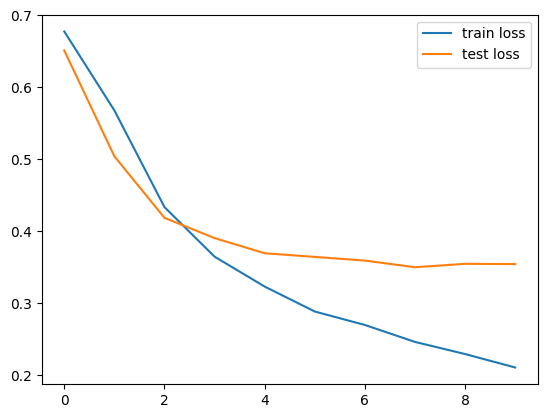

In [45]:
import matplotlib.pyplot as plt 

plt.plot(train_losses, label="train loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.show()

In [46]:
# Accuracy
n_correct = 0.
n_total = 0.
for inputs, targets, x_lens, y_lens in train_dataloader:
  targets = targets.view(-1, 1).float()
  inputs, targets = inputs.to(device), targets.to(device)

  # Forward pass
  outputs = model(inputs, x_lens)

  # Get prediction
  predictions = (outputs > 0)
  
  # update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

train_acc = n_correct / n_total

n_correct = 0.
n_total = 0.
for inputs, targets, x_lens, y_lens in test_dataloader:
  targets = targets.view(-1, 1).float()
  inputs, targets = inputs.to(device), targets.to(device)

  # Forward pass
  outputs = model(inputs, x_lens)

  # Get prediction
  predictions = (outputs > 0)
  
  # update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

test_acc = n_correct / n_total
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9232, Test acc: 0.8516


## 7-3. GRU

## 7-4. LSTM